# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Ramicane appears to be the most effective medicine for the tumour.
Capomulin is the second effective medicine.
There appears to be relation between the weight of mouse and the effectiveness of Capolmulin.
Almost same number of males and females are used in the study.
There is an outlineer in the effectiveness of Infubinol.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merged_df[merged_df["Mouse ID"].isin(duplicate_mouse_id)]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = merged_df[~ merged_df["Mouse ID"].isin(duplicate_mouse_id)]
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_group = mouse_study_clean.groupby("Drug Regimen")
mean = drug_group["Tumor Volume (mm3)"].mean()
median = drug_group["Tumor Volume (mm3)"].median()
var = drug_group["Tumor Volume (mm3)"].var()
std = drug_group["Tumor Volume (mm3)"].std()
sem = drug_group["Tumor Volume (mm3)"].sem()

drug_tumor_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": std, "SEM": sem})
drug_tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_agg = mouse_study_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Number of Mice by Drug Regimen'}, xlabel='Drug Regimen'>

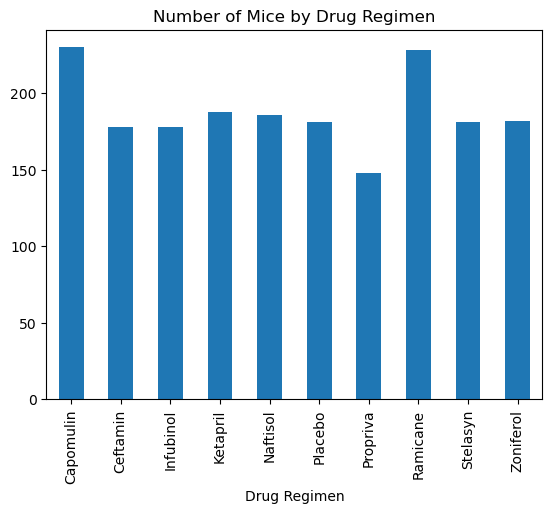

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_study_clean.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index(name="Count of Mouse ID").plot.bar(x="Drug Regimen",y="Count of Mouse ID",legend=False,title="Number of Mice by Drug Regimen")

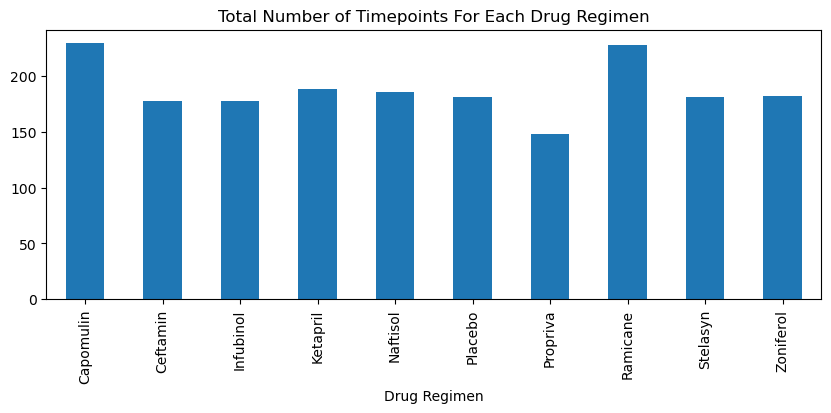

<Figure size 640x480 with 0 Axes>

In [10]:
timepoint_drug = mouse_study_clean.groupby("Drug Regimen")["Timepoint"].count()
timepoint_drug.plot(kind="bar", figsize=(10,3.5))
plt.title("Total Number of Timepoints For Each Drug Regimen")
plt.show()
plt.tight_layout()

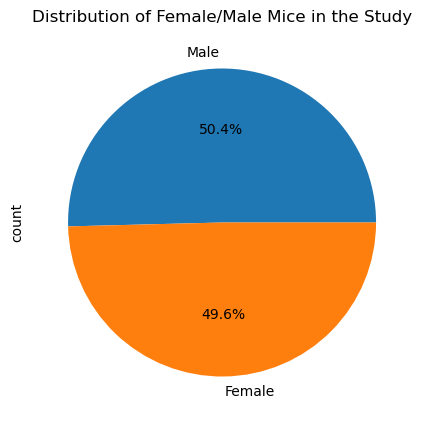

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
mouse_metadata_clean = mouse_metadata.loc[~mouse_metadata["Mouse ID"].isin(duplicate_mouse_id)]
distribution = mouse_metadata_clean["Sex"].value_counts()

distribution.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', startangle=0)
plt.title("Distribution of Female/Male Mice in the Study")
plt.show()

<Axes: title={'center': 'Distribution of Gender in Test'}>

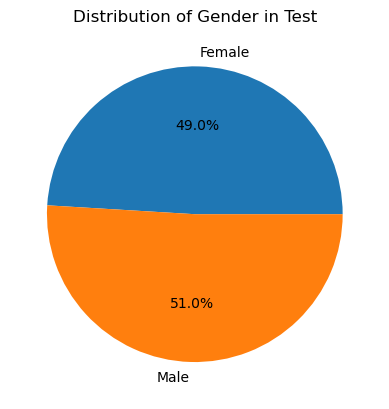

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_clean.groupby(["Sex"])["Mouse ID"].count().plot.pie(title="Distribution of Gender in Test",label="",autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = mouse_study_clean.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(max_tp, mouse_study_clean, how="left", on=["Mouse ID", "Timepoint"])
final_tumor.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    final_tumor_treatment = final_tumor.loc[final_tumor["Drug Regimen"] == treatment]
    
    # add subset 
tumor_vol_data.append(final_tumor_treatment["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
for index, treatment in enumerate(tumor_vol_data):
    treatment_name = treatments[index]
    
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment_name} is: {round(lowerq,2)}.")
    print(f"The upper quartile of {treatment_name} is: {round(upperq,2)}.")
    print(f"The interquartile range of {treatment_name} is: {round(iqr,2)}.")
    print(f"The the median of {treatment_name} is: {round(quartiles[0.5],2)}.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers for {treatment_name}.")
    print(f"Values above {round(upper_bound,2)} could be outliers for {treatment_name}.")
    outliers = (final_tumor.loc[(final_tumor["Drug Regimen"] == treatment_name) & ((final_tumor["Tumor Volume (mm3)"] < lower_bound) | (final_tumor["Tumor Volume (mm3)"] > upper_bound))])
    outliers_no = len(outliers)
    print(f"The number of outliers for {treatment_name} is: {outliers_no}.")
    if outliers_no > 0:
        outlier_list = outliers["Mouse ID"].to_numpy()
        print(f"The outliers are: {outlier_list}.")
    print("")

The lower quartile of Capomulin is: 48.72.
The upper quartile of Capomulin is: 64.3.
The interquartile range of Capomulin is: 15.58.
The the median of Capomulin is: 59.85.
Values below 25.36 could be outliers for Capomulin.
Values above 87.67 could be outliers for Capomulin.
The number of outliers for Capomulin is: 1.
The outliers are: ['s185'].



In [39]:
tumor_vol_data

[3      62.999356
 21     45.000000
 22     56.057749
 25     55.742829
 58     48.722078
 75     47.784682
 88     61.849023
 94     68.923185
 106    67.748662
 107    57.918381
 109    46.784535
 110    59.851956
 113    64.299830
 134    59.741901
 150    61.433892
 154    64.192341
 184    45.000000
 188    52.925348
 189    45.000000
 209    67.527482
 223    45.000000
 228    64.634949
 231    61.386660
 238    68.594745
 240    64.729837
 Name: Tumor Volume (mm3), dtype: float64]

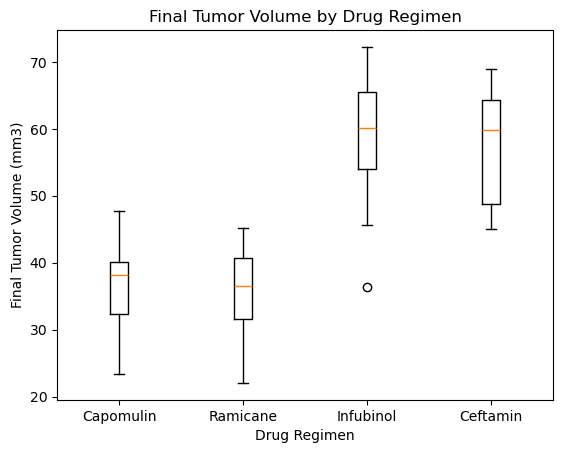

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1 ,ax1 = plt.subplots()
for treatment in treatments:
    data = final_tumor[final_tumor['Drug Regimen']== treatment]['Tumor Volume (mm3)']
    ax1.boxplot(data, positions = [treatments.index(treatment) + 1], labels = [treatment])
    ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume by Drug Regimen')
plt.show()

## Line and Scatter Plots

(30.0, 48.0)

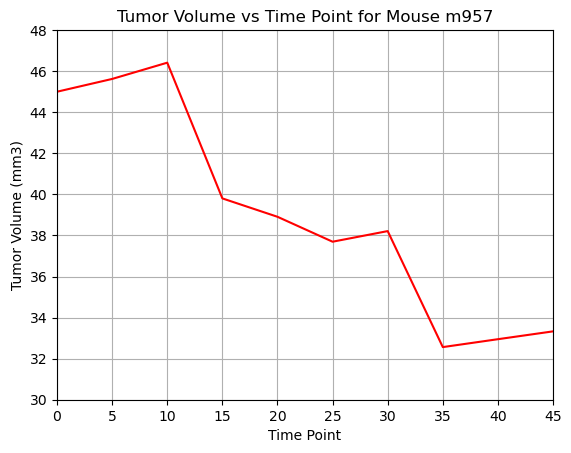

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "m957"
mouse_df = mouse_study_clean.loc[mouse_study_clean["Mouse ID"] == mouse, ["Timepoint", "Tumor Volume (mm3)"]]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], color="red", label=mouse)
plt.title(f"Tumor Volume vs Time Point for Mouse {mouse}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.xlim(0,max(mouse_df["Timepoint"]))
plt.ylim(int(min(mouse_df["Tumor Volume (mm3)"]))-2,int(max(mouse_df["Tumor Volume (mm3)"]))+2)

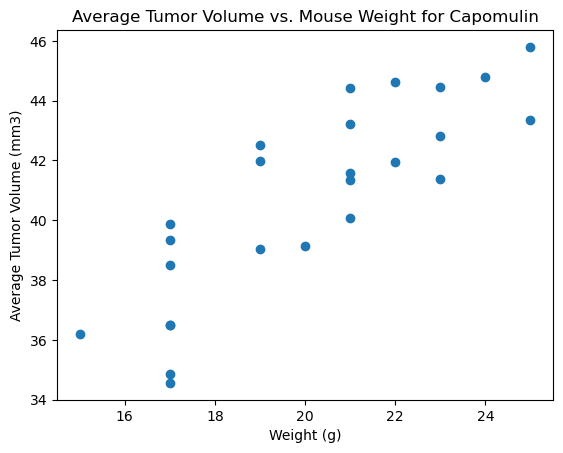

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
av_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight,av_tumor)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.71.


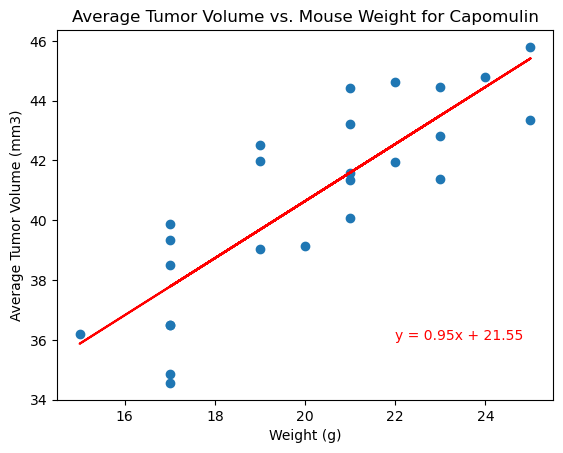

In [46]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, av_tumor)
fit = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, av_tumor)
plt.plot(weight,fit,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(22,36), fontsize=10, color="red")
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(rvalue**2,2)}.")